In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
import time
import datetime
import collections 
import seaborn as sns

In [2]:
# df = pd.read_csv(r"C:\Users\Purva\Desktop\Avishkar 2020\Logical Rhythm\steam_train.csv")
df = pd.read_csv(r"C:\Users\kshit\Desktop\Avishkar\LR\Game\steam_train.csv")
df.dropna()
df.reset_index(inplace=True)
df=df.drop(columns=['index'])
df.drop('name', inplace=True, axis=1)
df.drop('developer', inplace=True, axis=1)
df.drop('publisher', inplace=True, axis=1)

# df.set_index('appid', inplace=True)
# df=df[:10]
# dftest = pd.read_csv(r"C:\Users\Purva\Desktop\Avishkar 2020\Logical Rhythm\steam_test.csv")
dftest = pd.read_csv(r"C:\Users\kshit\Desktop\Avishkar\LR\Game\steam_test.csv")
dftest.dropna()
dftest.reset_index(inplace=True)
dftest=dftest.drop(columns=['index'])
dftest.drop('name', inplace=True, axis=1)
dftest.drop('developer', inplace=True, axis=1)
dftest.drop('publisher', inplace=True, axis=1)

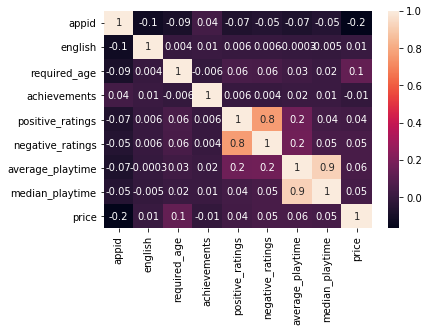

In [3]:
sns.heatmap(df.corr(), annot = True, fmt='.1g')

In [4]:
#-------------------------to find allowed category-----------------------
l=[]
for i in df['categories']:
    l1=i.split(';');
    for j in l1:
        l.append(j);
        
freq=collections.Counter(l) ##stores frequency of all used keywords
# print(freq['Single-player'])
# for (key, value) in freq.items(): 
#     print (key, " -> ", value) 
l2=sorted(freq.items(), key = lambda kv:(kv[1], kv[0]))  ##sorting the key value pairs of frequency to analyse

allowedcat=[] ##stores categories with frequency greater than 1000
for i in l2:
    if(i[1]>100):
        allowedcat.append(i[0])  
# allowedcat
#---------------------------------------------------------------------

#-------------to find allowed genres----------------------------------
l=[]
for i in df['genres']:
    l1=i.split(';');
    for j in l1:
        l.append(j);
        
freq=collections.Counter(l) ##stores frequency of all used keywords
l2=sorted(freq.items(), key = lambda kv:(kv[1], kv[0])) ##sorting the key value pairs of frequency to analyse
allowedgen=[] ##stores genres with frequency greater than 1000
for i in l2:
    if(i[1]>100):
        allowedgen.append(i[0])       
# allowedgen
#----------------------------------------------------------------------

In [5]:
#-----------FOR TRAINING DATASET---------------------------------------------------------------
#-----------breaking down platforms column to its keywords possible ----------------------
plats=['windows', 'linux', 'mac']

for i in plats:
        df[i]=0
        dftest[i]=0
    
count=0
for i in df['platforms']:
    for j in plats:
        if j in i:
            df.at[count, j]=1
    count+=1
df.drop('platforms', inplace=True, axis=1)
#-----------------------------------------------------------------------------------------
#-----------breaking down categories column to its keywords possible ----------------------

for i in allowedcat:
        df[i]=0
df['othercat']=0
count=0
for i in df['categories']:
    for j in allowedcat:
        if j in i: ## if frequency > threshhold
            df.at[count, j]=1 
        else: ## include in others
            df.at[count, 'othercat']=1
    count+=1
df.drop('categories', inplace=True, axis=1)

#-----------breaking down genres column to its keywords possible ----------------------
for i in allowedgen:
        df[i]=0
df['othergenre']=0
count=0
for i in df['genres']:
    for j in allowedgen:
        if j in i: ## if frequency > threshhold
            df.at[count, j]=1
        else: ## include in others
            df.at[count, 'othergen']=1
    count+=1
df.drop('genres', inplace=True, axis=1)
#--------------------------------------------------------------------------------------

# tags=list(tag)
# tags.remove('')

# for i in tags:
#         df[i]=0
# count=0
# for i in df['steamspy_tags']:
#     for j in tags:
#         if j in i:
#             df.at[count, j]=1
#     count+=1
df.drop('steamspy_tags', inplace=True, axis=1)

# <---------------convert range to mean for owners-------------------------->
count=0
for i in df['owners']:
    temp=i.split('-') 
    df.at[count, 'owners']=((int(temp[1])-int(temp[0]))/2) 
    count=count+1
#----------------------------------------------------------------------------
# <--------------convert absolute date timestamp difference from current date-------------------------->
count=0
basedate='2020-10-02'
basedate=time.mktime(datetime.datetime.strptime(basedate,"%Y-%m-%d").timetuple())
# print(basedate)
for i in df['release_date']:
    temp=time.mktime(datetime.datetime.strptime(i,"%Y-%m-%d").timetuple()) #convert release_date to timestamp
    df.at[count, 'release_date']=basedate-temp  #release_date contains timestamp difference from today(total )  
    count+=1
#---------------------------------------------------------------------------------------------------------

In [6]:
#-----------FOR TEST DATASET---------------------------------------------------------------
#-----------breaking down platforms column to its keywords possible ----------------------
plats=['windows', 'linux', 'mac']

for i in plats:
        dftest[i]=0
        dftest[i]=0
    
count=0
for i in dftest['platforms']:
    for j in plats:
        if j in i:
            dftest.at[count, j]=1
    count+=1
dftest.drop('platforms', inplace=True, axis=1)
#-----------------------------------------------------------------------------------------
#-----------breaking down categories column to its keywords possible ----------------------

for i in allowedcat:
        dftest[i]=0
dftest['othercat']=0
count=0
for i in dftest['categories']:
    for j in allowedcat:
        if j in i: ## if frequency > threshhold
            dftest.at[count, j]=1 
        else: ## include in others
            dftest.at[count, 'othercat']=1
    count+=1
dftest.drop('categories', inplace=True, axis=1)

#-----------breaking down genres column to its keywords possible ----------------------
for i in allowedgen:
        dftest[i]=0
dftest['othergenre']=0
count=0
for i in dftest['genres']:
    for j in allowedgen:
        if j in i: ## if frequency > threshhold
            dftest.at[count, j]=1
        else: ## include in others
            dftest.at[count, 'othergen']=1
    count+=1
dftest.drop('genres', inplace=True, axis=1)
#--------------------------------------------------------------------------------------

# tags=list(tag)
# tags.remove('')

# for i in tags:
#         dftest[i]=0
# count=0
# for i in dftest['steamspy_tags']:
#     for j in tags:
#         if j in i:
#             dftest.at[count, j]=1
#     count+=1
dftest.drop('steamspy_tags', inplace=True, axis=1)

# <---------------convert range to mean for owners-------------------------->
count=0
for i in dftest['owners']:
    temp=i.split('-') 
    dftest.at[count, 'owners']=((int(temp[1])-int(temp[0]))/2) 
    count=count+1
#----------------------------------------------------------------------------
# <--------------convert absolute date timestamp difference from current date-------------------------->
count=0
basedate='2020-10-02'
basedate=time.mktime(datetime.datetime.strptime(basedate,"%Y-%m-%d").timetuple())
# print(basedate)
for i in dftest['release_date']:
    temp=time.mktime(datetime.datetime.strptime(i,"%Y-%m-%d").timetuple()) #convert release_date to timestamp
    dftest.at[count, 'release_date']=basedate-temp  #release_date contains timestamp difference from today(total )  
    count+=1
#---------------------------------------------------------------------------------------------------------

In [7]:
df.shape
df.dropna()
df.shape

(25044, 57)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

#-------------For Training dataset, dividing age in 2 broad categories to reduce complexity(below and above 16)---------
age=[]
for i in df['required_age']:
    if(i>=16):
        age.append("0")
    else:
        age.append("1")
df['age']=age
df[df['required_age'] > 0] 
df
#---------------------------------------------------------------------------------------------------------------------
#-------------For Training dataset, dividing age in 2 broad categories to reduce complexity(below and above 16)---------
age=[]
for i in dftest['required_age']:
    if(i>=16):
        age.append("0")
    else:
        age.append("1")
dftest['age']=age
dftest[dftest['required_age'] > 0] 
dftest

df.set_index('appid', inplace=True)
dftest.set_index('appid', inplace=True)

#-------------------------------------------------------------------------------------------------------------------
# ------------------------------------SCALING-------------------------------------------------------------
df['release_date']=((df['release_date']-df['release_date'].min())/(df['release_date'].max()-df['release_date'].min()))*100
dftest['release_date']=((dftest['release_date']-dftest['release_date'].min())/(dftest['release_date'].max()-dftest['release_date'].min()))*100

df['achievements']=((df['achievements']-df['achievements'].min())/(df['achievements'].max()-df['achievements'].min()))*100
dftest['achievements']=((dftest['achievements']-dftest['achievements'].min())/(dftest['achievements'].max()-dftest['achievements'].min()))*100

df['positive_ratings']=((df['positive_ratings']-df['positive_ratings'].min())/(df['positive_ratings'].max()-df['positive_ratings'].min()))*100
dftest['positive_ratings']=((dftest['positive_ratings']-dftest['positive_ratings'].min())/(dftest['positive_ratings'].max()-dftest['positive_ratings'].min()))*100

df['negative_ratings']=((df['negative_ratings']-df['negative_ratings'].min())/(df['negative_ratings'].max()-df['negative_ratings'].min()))*100
dftest['negative_ratings']=((dftest['negative_ratings']-dftest['negative_ratings'].min())/(dftest['negative_ratings'].max()-dftest['negative_ratings'].min()))*100

df['average_playtime']=((df['average_playtime']-df['average_playtime'].min())/(df['average_playtime'].max()-df['average_playtime'].min()))*100
dftest['average_playtime']=((dftest['average_playtime']-dftest['average_playtime'].min())/(dftest['average_playtime'].max()-dftest['average_playtime'].min()))*100

df['median_playtime']=((df['median_playtime']-df['median_playtime'].min())/(df['median_playtime'].max()-df['median_playtime'].min()))*100
dftest['median_playtime']=((dftest['median_playtime']-dftest['median_playtime'].min())/(dftest['median_playtime'].max()-dftest['median_playtime'].min()))*100

df['owners']=((df['owners']-df['owners'].min())/(df['owners'].max()-df['owners'].min()))*100
dftest['owners']=((dftest['owners']-dftest['owners'].min())/(dftest['owners'].max()-dftest['owners'].min()))*100

df['required_age']=((df['required_age']-df['required_age'].min())/(df['required_age'].max()-df['required_age'].min()))*100
dftest['required_age']=((dftest['required_age']-dftest['required_age'].min())/(dftest['required_age'].max()-dftest['required_age'].min()))*100
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------

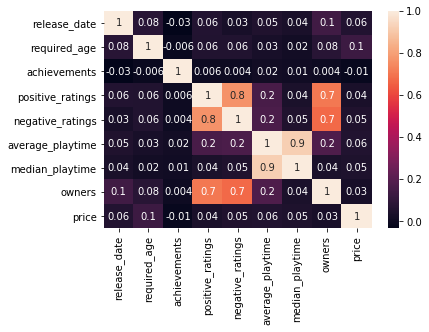

In [11]:
# df.
df = df.astype({"owners":'float64'}) 
df = df.astype({"release_date":'float64'}) 
dftest = dftest.astype({"owners":'float64'}) 
dftest = dftest.astype({"release_date":'float64'}) 
corr = df.corr()
# vars2=['price']
vars = ['release_date','required_age','achievements','positive_ratings','negative_ratings','average_playtime','median_playtime','owners','price']
sns.heatmap(corr.loc[vars,vars],annot=True,fmt='.1g')
# sns.heatmap(df.corr(), annot = True, fmt='.1g')

In [10]:
X = df.drop('price', axis=1)
y = df['price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf = svm.SVR(C=10)
k=clf.fit(X_train, y_train)

y_predict = k.predict(X_test)
# print(X_test)
# print(y_predict)
# print("R2 score (accuracy of predicted ratings): ", r2_score(y_test, y_predict))
print("Mean squared error (SVM): {:.2f}".format(mean_squared_error(y_test, y_predict)))

C:\Users\kshit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

In [ ]:
# ---------------------------------------BEST in SVR-------------------------------
X_train = df.drop('price', axis=1)
y_train = df['price']
X_test = dftest

clf = svm.SVR(C=10)
k=clf.fit(X_train, y_train)
y_predict = k.predict(X_test)
y_predict

In [18]:
from numpy import asarray
from numpy import savetxt
savetxt('svr-rbf-c=10 scale.csv', y_predict, delimiter=',')